# Section 1: Business Understanding


Below are the few business question that business need answers by analysing the data.

1. What is the Top selling product?

2. Top Crossing Product?

3. Who are the Top Retailers ?

4. Which channel has top selling ?

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

from sklearn import tree

Using the Adidas sales data for inorder to get three business query:

1. What is the Top selling product?
2. Top Crossing Product?
3. Who are the Top Retailers ?


In [7]:
import pandas as pd
import io
def read_data(filepath):
    ''' This method is used to read data from the csv file 
    and return data frame.
    '''
    
    df=pd.read_csv(filepath)
    return df
    

### Section 2: Data Understanding
### Gather Data

In [68]:

filepath=r"C:\Users\176288724\Downloads\data\Adidas.csv"
df=read_data(filepath)


### Clean Data

In [48]:
# shape of dataset
df.shape

(9648, 13)

In [49]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   int64  
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Product           9648 non-null   object 
 7   Price per Unit    9648 non-null   object 
 8   Units Sold        9648 non-null   object 
 9   Total Sales       9648 non-null   int64  
 10  Operating Profit  9648 non-null   int64  
 11  Operating Margin  9648 non-null   float64
 12  Sales Method      9648 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 980.0+ KB


In [50]:
# count NAN in dataset
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [51]:
df.describe() # summary of Data

,Retailer ID,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,93273.437500,34425.282131,0.422991
std,2.636038e+04,141916.016727,54193.124141,0.097197
min,1.128299e+06,0.000000,0.000000,0.100000
25%,1.185732e+06,4254.500000,1922.000000,0.350000
50%,1.185732e+06,9576.000000,4371.500000,0.410000
75%,1.185732e+06,150000.000000,52063.000000,0.490000
max,1.197831e+06,825000.000000,390000.000000,0.800000


In [52]:
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [53]:
df.head(1)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01/01/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200",600000,300000,0.5,In-store


### Section 3:  Data Analysis & Visualization

In [121]:
%%pycodestyle
top_selling_products = df.groupby('Product')['Total Sales'].sum().reset_index()
top_selling_products.index += 1

4:1: W391 blank line at end of file


### Graphical interpretation of these values

Text(0.5, 1.0, 'Top Selling Products')

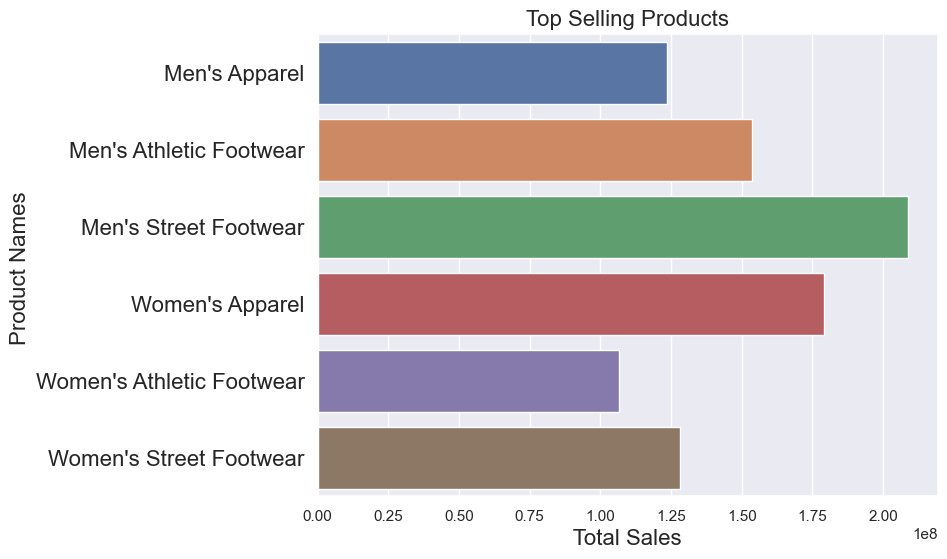

In [55]:
fig , ax = plt.subplots(figsize=(8,6))

sns.barplot(data = top_selling_products,y= 'Product',x ='Total Sales')
ax.set_yticklabels(ax.get_yticklabels() , fontsize = 16)

ax.set_xlabel(' Total Sales ', fontsize = 16)
ax.set_ylabel('Product Names ', fontsize = 16)
ax.set_title('Top Selling Products', fontsize = 16)

we can see men's streetFootwear has good sales in comparision to other product category, we can launch offers on other category to focus on other as well.

### Top Grossing Cities

In [56]:
top_grossing = df.groupby('City')['Operating Profit'].sum().sort_values(ascending = False).reset_index().head(10)
top_grossing.index+=1
top_grossing

,City,Operating Profit
1,Charleston,15607205
2,New York,13899981
3,Miami,12168628
4,Portland,10760813
5,San Francisco,10256252
6,Houston,9845140
7,Charlotte,9756425
8,Albany,9429864
9,New Orleans,9417239
10,Birmingham,9147581


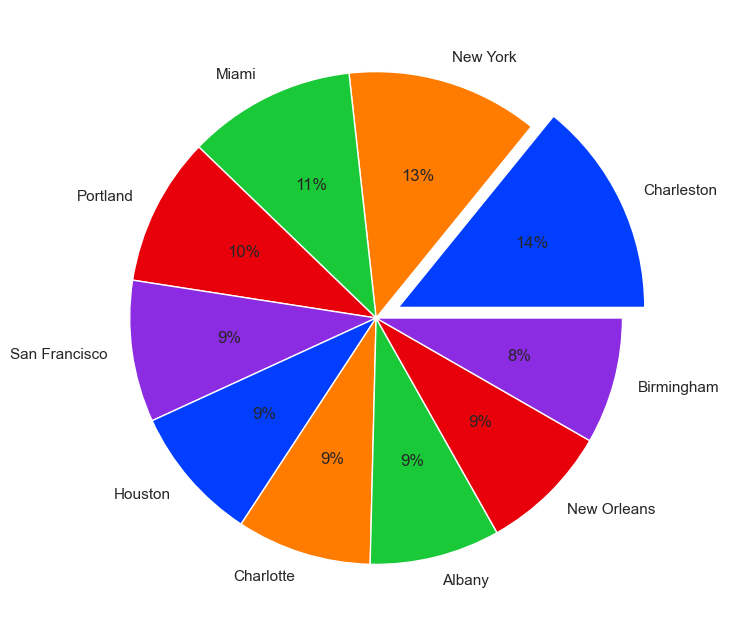

In [57]:
#for pie chart we need 2 lists
data= list(top_grossing['Operating Profit']) #convert Operating Profit series in a list
labels = list(top_grossing['City']) #convert city series in a list
fig , ax = plt.subplots(figsize=(10,8))

colors = sns.color_palette('bright')[0:5]
plt.pie(data, labels = labels,colors = colors, autopct='%.0f%%', explode = (0.1, 0,0,0,0,0,0,0,0,0))
plt.show()


In [123]:
Here , Need to focus on low sales cities or launch some canpanign as the way doing Charleston.

SyntaxError: invalid syntax (1901813722.py, line 1)

### Who are the Top Retailers?

In [58]:
top_retailors = df.groupby('Retailer')['Operating Profit'].sum().sort_values(ascending=False).reset_index()
top_retailors.index += 1
top_retailors

,Retailer,Operating Profit
1,West Gear,85667968
2,Foot Locker,80722234
3,Sports Direct,74333022
4,Kohl's,36811302
5,Amazon,28818533
6,Walmart,25782063


### Bar Chart of Top Retailers

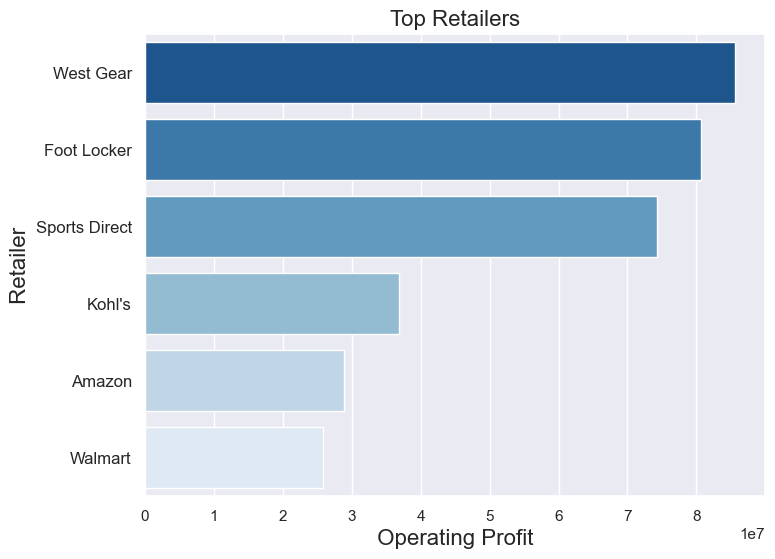

In [59]:
fig , ax = plt.subplots(figsize=(8,6))
sns.set(style='darkgrid')
sns.barplot(data=top_retailors, x='Operating Profit', y='Retailer', palette='Blues_r')
ax.set_yticklabels(ax.get_yticklabels() , fontsize = 12)
ax.set_xlabel(' Operating Profit ', fontsize = 16)
ax.set_ylabel(' Retailer ', fontsize = 16)
ax.set_title('Top Retailers', fontsize = 16)
plt.show()

Here, Need to focus to low business retailer and to indentify the root cause at store level.

### Top Selling Methods

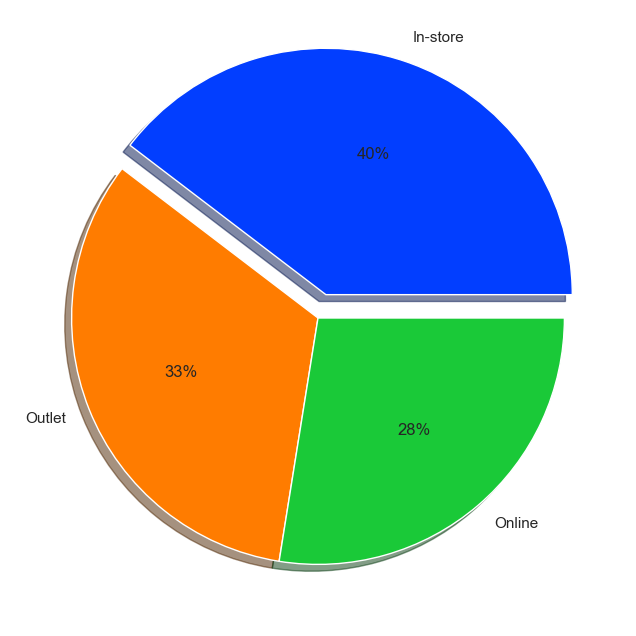

In [60]:
top_methods = df.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending=False).reset_index()
#for pie chart we need 2 lists
data= list(top_methods['Total Sales']) #convert Operating Profit series in a list
labels = list(top_methods['Sales Method'])
fig , ax = plt.subplots(figsize=(10,8))

colors = sns.color_palette('bright')[0:5]
plt.pie(data, labels = labels,colors = colors, autopct='%.0f%%', explode = (0.1, 0,0), shadow =True)
plt.show()

### Find Regression of Sales
### Correlation Between different Variables using Heatmap

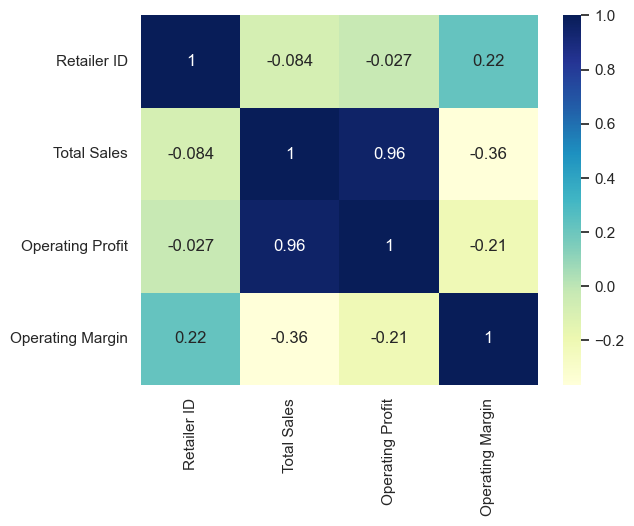

In [61]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Profit Margin and Total Sales Regression

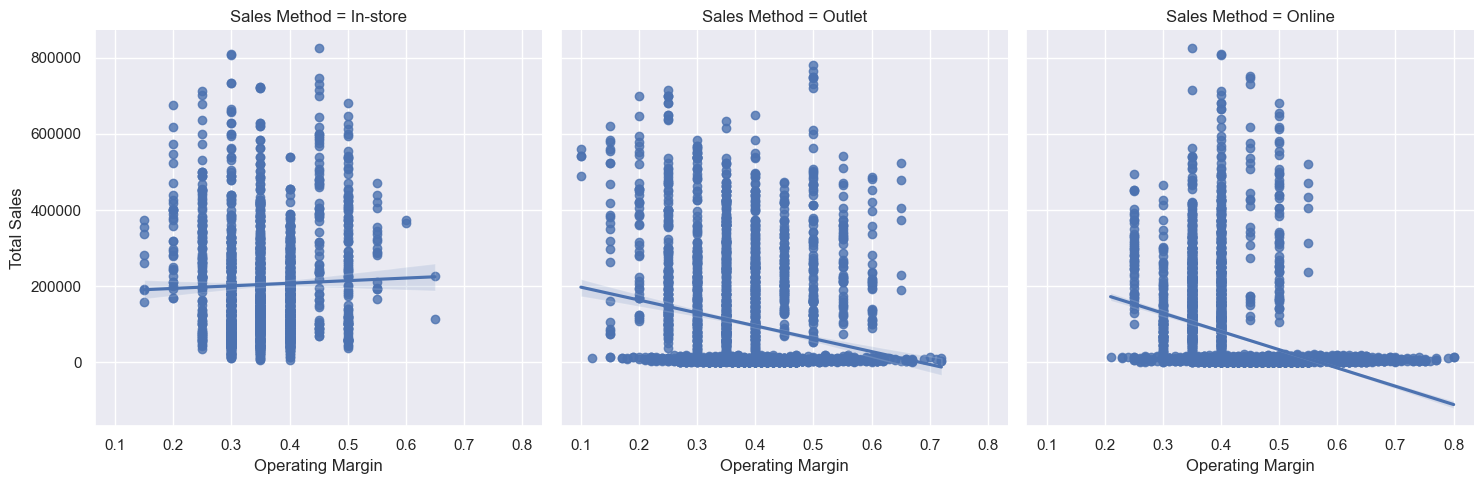

In [62]:
sns.lmplot(data = df, x ='Operating Margin',y = 'Total Sales',col ='Sales Method')

In [63]:
df.head(1)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01/01/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200",600000,300000,0.5,In-store


### Price per Unit and Total Sales Regression

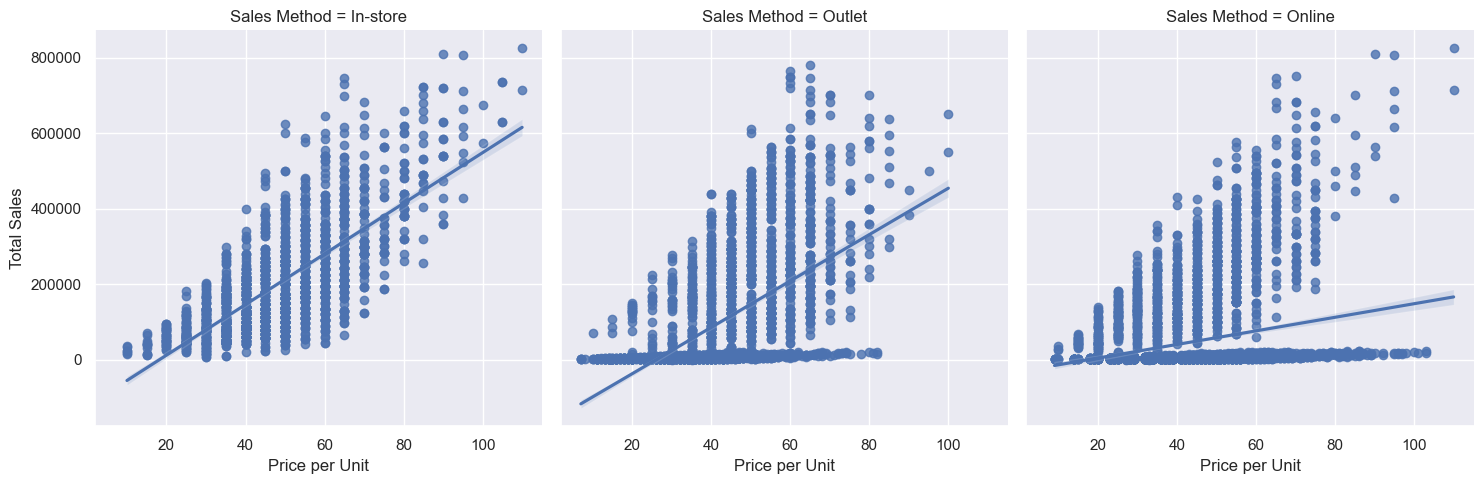

In [66]:
sns.lmplot(data = df, x ='Price per Unit',y = 'Total Sales',col ='Sales Method')

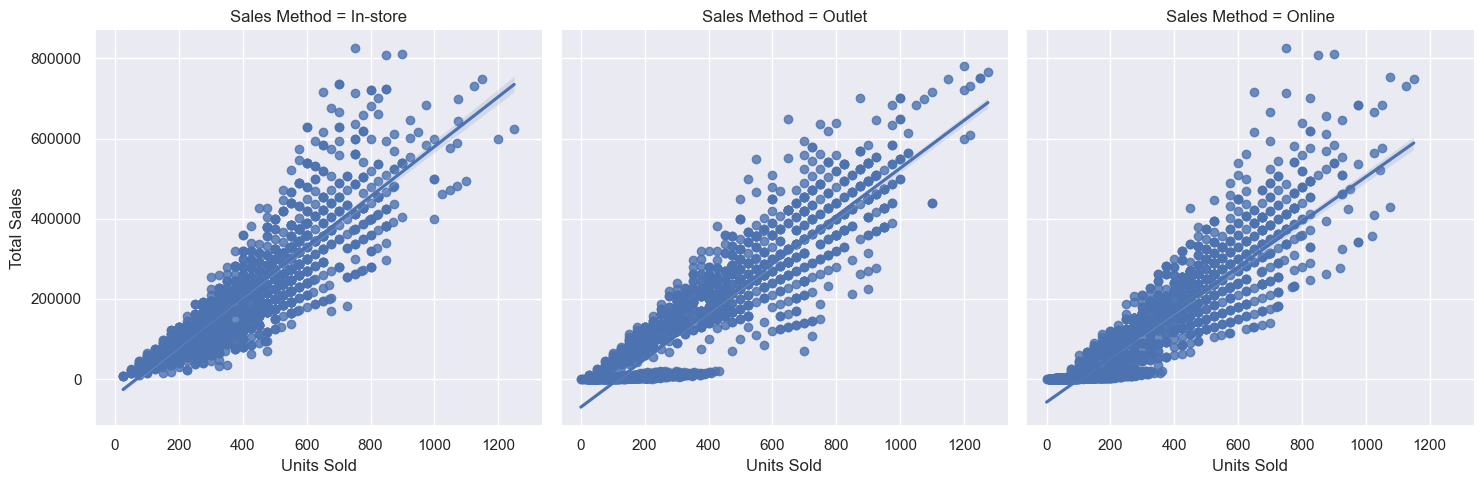

In [69]:
sns.lmplot(data = df, x ='Units Sold',y = 'Total Sales',col ='Sales Method')

### Section 5 : Data Modeling & Machine Learning

In [70]:
X = df[['Units Sold','Operating Profit','Operating Margin','Price per Unit']] #features
y = df['Total Sales'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Linear Regression Model

In [71]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
y_predicted

array([-32452.8073591 ,  10922.18186321,  29527.61614186, ...,
        40626.14261365,  37287.50169927, -12338.85559287])

In [72]:
model.score(X_test,y_test)

0.9570439308686203

### Random Forest Model

In [73]:
X = df[['Units Sold','Operating Profit','Operating Margin','Price per Unit']] #features
y = df['Total Sales'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
model = RandomForestRegressor (n_estimators = 5)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

In [75]:
model.score(X_test,y_test)

0.9987923726359136

### Descion Tree Model

In [76]:
model = tree.DecisionTreeRegressor()
X = df[['Units Sold','Operating Profit','Operating Margin','Price per Unit']] #features
y = df['Total Sales'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [77]:
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

In [80]:
y_predicted

array([4158., 7950., 3936., ..., 7995., 2040., 2775.])

In [78]:
model.score(X_test,y_test)

0.9991601015830406

In [95]:

X = {'Units Sold':[122],'Operating Profit':[50000],'Operating Margin':[.40],'Price per Unit':[45]}

### Conclusion

Descion Tree Model is performing best for this DataSet with accuracy score : 0.999.This Model will help the Business to predict the future sale.

In [122]:
!pip list

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkcharts                      0.2
blac